# Naive Bayes Gaussian - Babies, Teens and Adults




## Generating some training data


Each individual has two atributes (x0,x1)
x0 is heigth and
x1 is weight
There are three clases of individuals
babies, teens and adults

We generate 220 training examples

40 teens ~ Gaussian([120, 50], [[90,10 ],[10, 40]])
120 adults ~ Gaussian([150, 80], [[60, 10],[10, 40]])
60 teens ~ Gaussian([115, 90], [[60,10],[10, 40]])


### Importing required libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

%matplotlib inline
figsize = (15,8)

### Creating the data

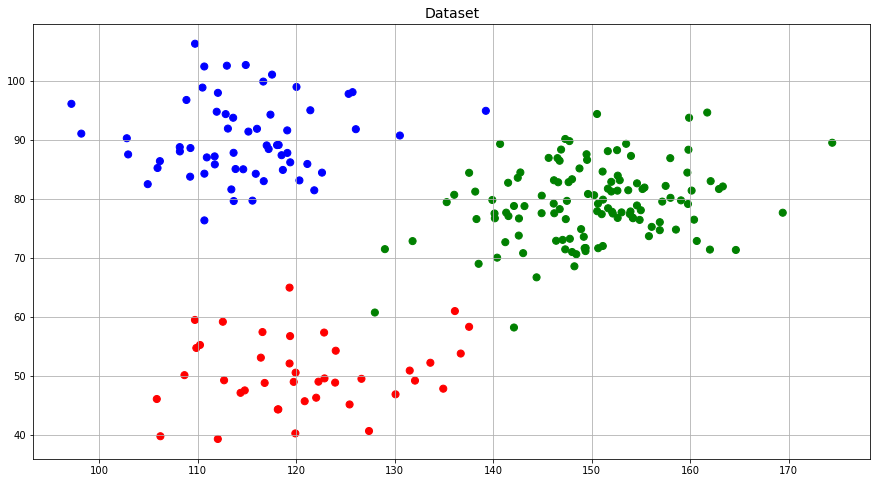

In [28]:
teens = np.random.multivariate_normal([120,50],[[90,10],[10,40]],40)
adults = np.random.multivariate_normal([150,80], [[60,10],[10,40]],120)
babies = np.random.multivariate_normal([115,90], [[60,10],[10,40]],60)
x = np.concatenate((teens,adults,babies),axis = 0)

y1 = np.zeros(len(teens))
y2 = np.ones(len(adults))
y3 = np.empty(len(babies))
y3.fill(2)
y = np.concatenate((y1,y2,y3),axis=0)

color = ['red' if v == 0 else 'green' if v == 1 else 'blue' for v in y]
fig = plt.figure(figsize=figsize)
plt.scatter(x[:,0],x[:,1],c=color,s=50)
plt.title('Dataset', size = 14)
plt.grid()

0, red
1, green
2, blue


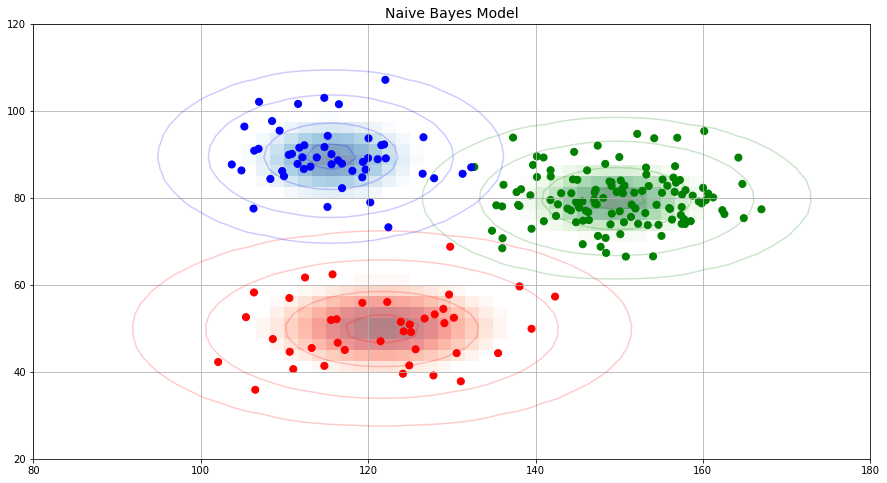

In [23]:
color = ['red' if v == 0 else 'green' if v == 1 else 'blue' for v in y]

fig = plt.figure(figsize = figsize)
ax = fig.add_subplot(111)
ax.scatter(x[:,0],x[:,1],c=color,s=50)
ax.set_title('Naive Bayes Model', size = 14)
xlim = (80,180)
ylim = (20,120)

xg = np.linspace(xlim[0],xlim[1],60)
yg = np.linspace(ylim[0],ylim[1],40)
xx,yy = np.meshgrid(xg,yg)
Xgrid = np.vstack([xx.ravel(),yy.ravel()]).T

for label,color in enumerate(['red','green','blue']):
    print(str(label) + ", " + str(color))
    mask = (y == label)
    mu,std = x[mask].mean(0), x[mask].std(0)
    P = np.exp(-.5 * (Xgrid-mu)**2 / std**2).prod(1)
    Pm = np.ma.masked_array(P,P < .3)
    ax.pcolorfast(xg,yg,Pm.reshape(xx.shape),alpha = .5, cmap = color.title() + 's')
    ax.contour(xx,yy,P.reshape(xx.shape),levels = [.01,.1,.5,.9],colors=color,alpha=.2)
ax.set(xlim=xlim,ylim=ylim)
ax.grid()

### Setting the Gaussian Naive Bayes 

In [31]:
model = GaussianNB()
model.fit(x,y)


x0 =  np.linspace(80,180,101)
x1 =  np.linspace(20,120,101)
g = np.meshgrid(x0,x1)
xmesh = np.append(g[0].reshape(-1,1),g[1].reshape(-1,1),axis=1)
ymesh= model.predict(xmesh)

### the decision boundary

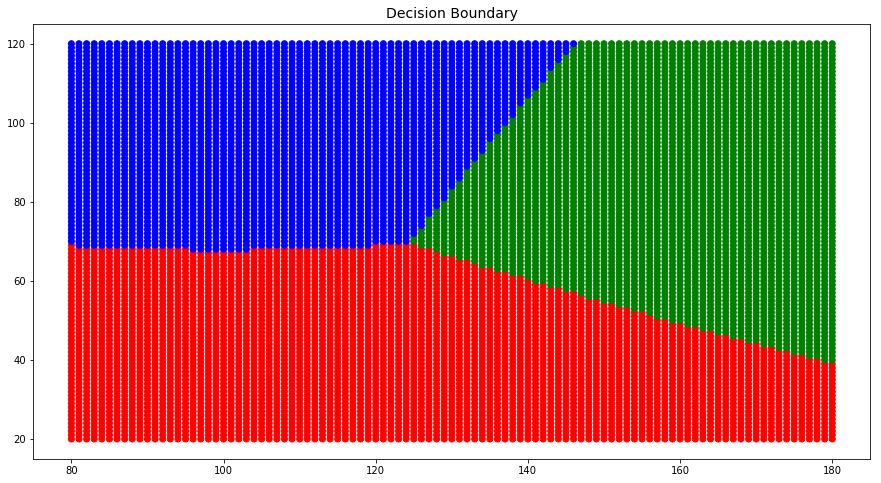

In [32]:
colormesh= ['red' if v == 0 else 'green' if v == 1 else 'blue' for v in ymesh]
fig = plt.figure(figsize = figsize)
plt.scatter(xmesh[:, 0], xmesh[:, 1], c=colormesh )
plt.title('Decision Boundary', size=14)

### Testing the model with some random data

In [33]:
rng = np.random.RandomState(0)
xnew = [80,20] + [100,100] * rng.rand(500,2)
ynew = model.predict(xnew) 

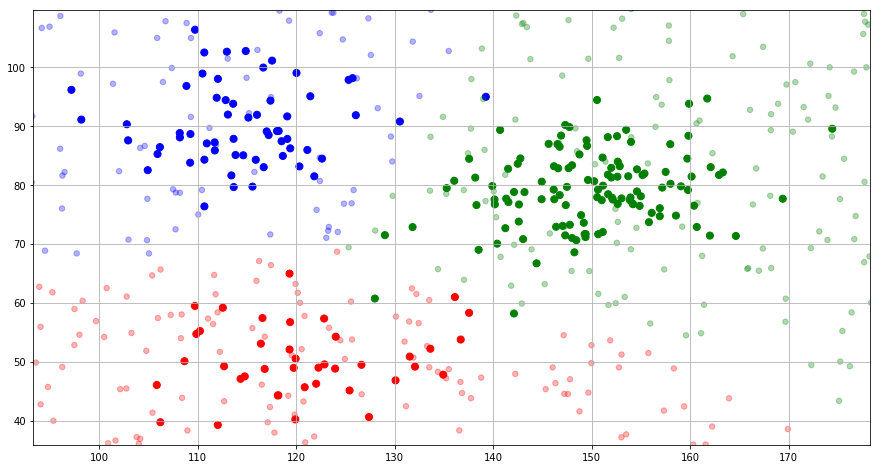

In [34]:
fig = plt.figure(figsize=figsize)
color = ['red' if v == 0 else 'green' if v == 1 else 'blue' for v in y]
plt.scatter(x[:,0].tolist(),x[:,1].tolist(),c=color,s=50)
lim = plt.axis()

colornew = ['red' if v == 0 else 'green' if v == 1 else 'blue' for v in ynew]
plt.scatter(xnew[:,0].tolist(),xnew[:,1].tolist(),c=colornew,s=30, alpha = .3)
plt.axis(lim)
plt.grid()

### Probabilistic classification - posterior probabilities for the classes

In [35]:
xnew[-20:].round(2)

array([[ 102.01,   82.29],
       [  91.15,   65.9 ],
       [ 112.23,   51.65],
       [ 128.26,   92.98],
       [  86.92,  107.92],
       [ 153.48,   37.65],
       [ 173.92,   70.63],
       [ 179.98,   39.73],
       [ 133.49,   49.02],
       [ 110.42,   79.11],
       [ 172.17,  100.53],
       [ 152.39,   75.92],
       [ 172.23,   69.24],
       [ 167.38,  103.4 ],
       [ 101.38,   97.12],
       [  81.22,   52.28],
       [ 102.96,   70.69],
       [ 153.69,   29.77],
       [ 131.49,  113.84],
       [ 102.86,   87.71]])

In [36]:
yprob = model.predict_proba(xnew[-20:])
yprob.round(2)

array([[ 0.  ,  0.  ,  1.  ],
       [ 0.91,  0.  ,  0.09],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.  ,  0.02,  0.98],
       [ 0.  ,  0.  ,  1.  ],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  ],
       [ 0.42,  0.58,  0.  ],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  1.  ],
       [ 0.  ,  1.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  ],
       [ 0.  ,  0.  ,  1.  ],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.06,  0.  ,  0.94],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  1.  ],
       [ 0.  ,  0.  ,  1.  ]])

### References

1. Naive Bayes 3: Gaussian example Victor Lavrenko https://www.youtube.com/watch?v=r1in0YNetG8&list=PLBv09BD7ez_7-4V3IJIzCHWQj9nd4rVWB&index=3
2. In Depth: Naive Bayes Classification https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Gaussian-Naive-Bayes

3. 6 Easy Steps to Learn Naive Bayes Algorithm (with codes in Python and R) https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/